In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import gkey

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [3]:
world_cities = pd.DataFrame(cities)
world_cities.head(10)

,0
0,iqaluit
1,rikitea
2,new norfolk
3,mataura
4,mangit
5,peleduy
6,zachary
7,arraial do cabo
8,san jose
9,kahului


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + gkey + "&q=" + "portland"
response = requests.get(url).json()
response

{'coord': {'lon': -122.6762, 'lat': 45.5234},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 36.25,
  'feels_like': 27.05,
  'temp_min': 30.43,
  'temp_max': 40.05,
  'pressure': 1026,
  'humidity': 61},
 'visibility': 10000,
 'wind': {'speed': 14.97, 'deg': 120},
 'clouds': {'all': 0},
 'dt': 1668918040,
 'sys': {'type': 2,
  'id': 2008548,
  'country': 'US',
  'sunrise': 1668870936,
  'sunset': 1668904619},
 'timezone': -28800,
 'id': 5746545,
 'name': 'Portland',
 'cod': 200}

In [15]:
#city = "barrow"
#city_url = url+"&q="+city
#response = requests.get(city_url).json()
#response

{'coord': {'lon': -156.7887, 'lat': 71.2906},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 19.42,
  'feels_like': 6.82,
  'temp_min': 19.42,
  'temp_max': 19.42,
  'pressure': 1010,
  'humidity': 86},
 'visibility': 10000,
 'wind': {'speed': 20.71, 'deg': 200},
 'clouds': {'all': 0},
 'dt': 1668916161,
 'sys': {'type': 1, 'id': 7649, 'country': 'US', 'sunrise': 0, 'sunset': 0},
 'timezone': -32400,
 'id': 5880054,
 'name': 'Barrow',
 'cod': 200}

In [17]:
#city_lat = response['coord']['lat']
#city_lat

71.2906

In [13]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={gkey}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['temp_min']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | mangit
Processing Record 6 of Set 1 | peleduy
Processing Record 7 of Set 1 | zachary
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | san jose
Processing Record 10 of Set 1 | kahului
Processing Record 11 of Set 1 | kodino
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | hoi an
Processing Record 19 of Set 1 | kez
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | lyuban
Processing Record 22 of Set 1 | punta arenas
Processing Record 

In [10]:
#print(city_data)

[{'City': 'iqaluit', 'Lat': 63.7506, 'Lng': -68.5145, 'Max Temp': -5.31, 'Humidity': -6.07, 'Cloudiness': 0, 'Wind Speed': 6.91, 'Country': 'CA', 'Date': 1668918551}, {'City': 'rikitea', 'Lat': -23.1203, 'Lng': -134.9692, 'Max Temp': 71.87, 'Humidity': 71.87, 'Cloudiness': 100, 'Wind Speed': 9.06, 'Country': 'PF', 'Date': 1668918726}, {'City': 'new norfolk', 'Lat': -42.7826, 'Lng': 147.0587, 'Max Temp': 62.92, 'Humidity': 54.91, 'Cloudiness': 100, 'Wind Speed': 13, 'Country': 'AU', 'Date': 1668918246}, {'City': 'mataura', 'Lat': -46.1927, 'Lng': 168.8643, 'Max Temp': 58.48, 'Humidity': 58.48, 'Cloudiness': 89, 'Wind Speed': 1.66, 'Country': 'NZ', 'Date': 1668918727}, {'City': 'mangit', 'Lat': 40.5971, 'Lng': 70.9607, 'Max Temp': 46.2, 'Humidity': 46.2, 'Cloudiness': 81, 'Wind Speed': 2.46, 'Country': 'UZ', 'Date': 1668918552}]


In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-5.31,-6.07,0,6.91,CA,1668918551
1,rikitea,-23.1203,-134.9692,71.87,71.87,100,9.06,PF,1668918726
2,new norfolk,-42.7826,147.0587,62.92,56.91,99,10.00,AU,1668918863
3,mataura,-46.1927,168.8643,58.48,58.48,89,1.66,NZ,1668918727
4,mangit,40.5971,70.9607,46.20,46.20,81,2.46,UZ,1668918552


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\Data Analystics\Module6\cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("C:\Data Analystics\Module6\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-5.31,-6.07,0,6.91,CA,1668918551
1,rikitea,-23.1203,-134.9692,71.87,71.87,100,9.06,PF,1668918726
2,new norfolk,-42.7826,147.0587,62.92,56.91,99,10.00,AU,1668918863
3,mataura,-46.1927,168.8643,58.48,58.48,89,1.66,NZ,1668918727
4,mangit,40.5971,70.9607,46.20,46.20,81,2.46,UZ,1668918552


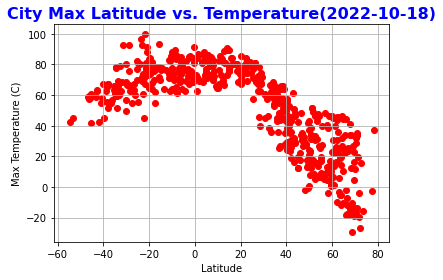

In [23]:
# Build scatter plot for latitude vs. temperature"
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", facecolors = "red" )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature(2022-10-18)", fontsize = 16, fontweight = "bold", color = "blue")

# Save the figure
plt.savefig("C:\Data Analystics\Module6\Fig1.png")

# Show plot
plt.grid()
plt.show()

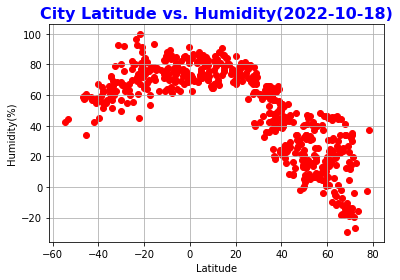

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", facecolors = "red" )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity(2022-10-18)", fontsize = 16, fontweight = "bold", color = "blue")

# Save the figure
plt.savefig("C:\Data Analystics\Module6\Fig2.png")

# Show plot
plt.grid()
plt.show()

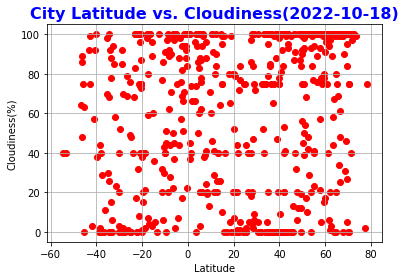

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", facecolors = "red" )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness(2022-10-18)", fontsize = 16, fontweight = "bold", color = "blue")

# Save the figure
plt.savefig("C:\Data Analystics\Module6\Fig2.png")

# Show plot
plt.grid()
plt.show()

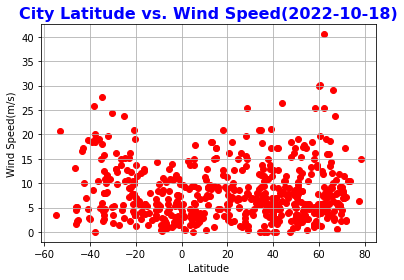

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", facecolors = "red" )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs. Wind Speed(2022-10-18)", fontsize = 16, fontweight = "bold", color = "blue")

# Save the figure
plt.savefig("C:\Data Analystics\Module6\Fig2.png")

# Show plot
plt.grid()
plt.show()

In [28]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

In [46]:
#Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>0]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-5.31,-6.07,0,6.91,CA,1668918551
4,mangit,40.5971,70.9607,46.20,46.20,81,2.46,UZ,1668918552
5,peleduy,59.6289,112.7406,0.39,0.39,78,1.41,RU,1668918864
6,zachary,30.6485,-91.1565,44.92,42.55,100,6.91,US,1668918865
8,san jose,37.3394,-121.8950,55.90,46.11,0,4.61,US,1668918632


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rikitea,-23.1203,-134.9692,71.87,71.87,100,9.06,PF,1668918726
2,new norfolk,-42.7826,147.0587,62.92,56.91,99,10.00,AU,1668918863
3,mataura,-46.1927,168.8643,58.48,58.48,89,1.66,NZ,1668918727
7,arraial do cabo,-22.9661,-42.0278,69.44,69.44,100,7.14,BR,1668918865
12,busselton,-33.6500,115.3333,69.17,69.17,78,4.72,AU,1668918868


The r-squared is: 0.7387285274594864


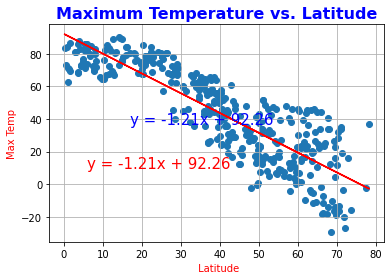

In [59]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Max Temp', color= "red")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Maximum Temperature vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("C:\Data Analystics\Module6\Fig3.png")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

The r-squared is: 0.33504340481371775


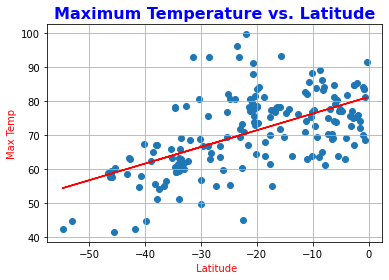

In [60]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Max Temp', color= "red")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Maximum Temperature vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("C:\Data Analystics\Module6\Fig4.png")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

The r-squared is: 0.7368079826289625


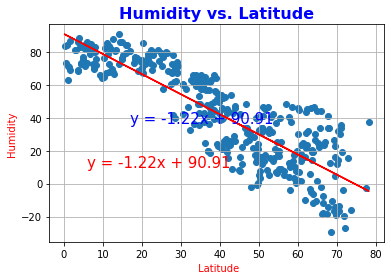

In [61]:
#Humidity Vs Latitude Linear Regression Plot
#Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Humidity', color= "red")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("C:\Data Analystics\Module6\Fig5.png")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

The r-squared is: 0.3623652366439533


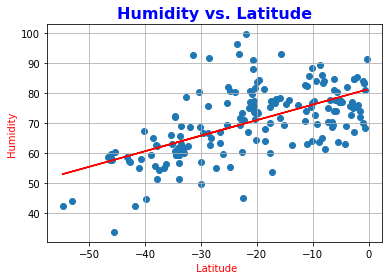

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Humidity', color= "red")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("C:\Data Analystics\Module6\Fig6.png")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

The r-squared is: 0.030221848300285993


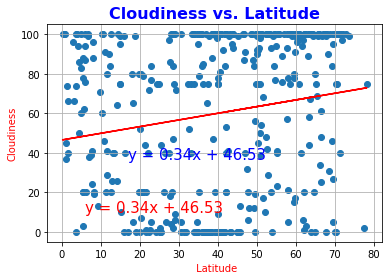

In [63]:
#Latitude Vs Cloudiness Linear Regression plot
 #Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Cloudiness', color= "red")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Cloudiness vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("C:\Data Analystics\Module6\Fig7.png")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()



The r-squared is: 0.058427227417228146


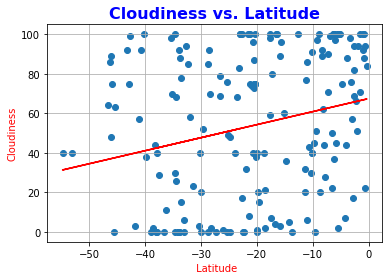

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Cloudiness', color= "red")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Cloudiness vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("C:\Data Analystics\Module6\Fig8.png")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

The r-squared is: 0.009465173408383284


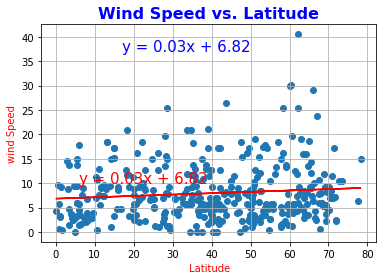

In [67]:
#Wind Speed Vs Lat Linear Regression Plot
 #Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('wind Speed', color= "red")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Wind Speed vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("C:\Data Analystics\Module6\Fig7.png")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

The r-squared is: 0.10329395400601585


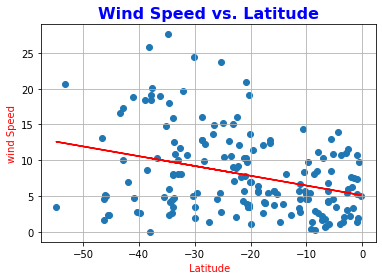

In [68]:
#Wind Speed Vs Lat Linear Regression Plot
 #Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('wind Speed', color= "red")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Wind Speed vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("C:\Data Analystics\Module6\Fig7.png")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()